# Phylogenetic tree of sea urchins

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from google.colab import files # for file upload & download

In [39]:
uploads = files.upload() # upload your distance matrix here

Saving matrix2.xlsx to matrix2.xlsx


In [40]:
df = pd.read_excel(r"matrix2.xlsx") # turn .xlsx file into data frame
df

,Unnamed: 0,Peristome position,Periproct position,Apex position,Flatness,Degree of symmetry,Ambulacral,Contains lunula,Roundness
0,Brissus,2,1,1,0,0,1,1,1
1,Dendraster,0,2,1,1,0,1,1,0
2,Diadema,0,0,0,0,1,0,1,0
3,Echinarachnius,0,1,0,1,1,1,1,0
4,Echinodiscus,0,2,0,1,0,1,0,2
5,Echinolampas,1,2,0,0,0,1,1,0
6,Eucidaris,0,0,0,0,1,0,1,0
7,Leodia,0,2,0,1,0,1,0,2
8,Nucleolites,1,1,0,0,0,1,1,1
9,Rotula,0,2,0,1,0,1,0,0


Now we put the names into a separate matrix and keep only the values of characters

In [42]:
Taxa = df.iloc[:,0].values # select taxon names
Characters = df.iloc[:, 1:] # select character vaues


In [43]:
sequences_str = Characters.values.astype(np.uint8)

Calculate distance matrix using [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

In [44]:
distance_matrix = squareform(pdist(sequences_str, metric='euclidean'))

Visualize the distance matrix

Text(0, 0.5, 'Distance')

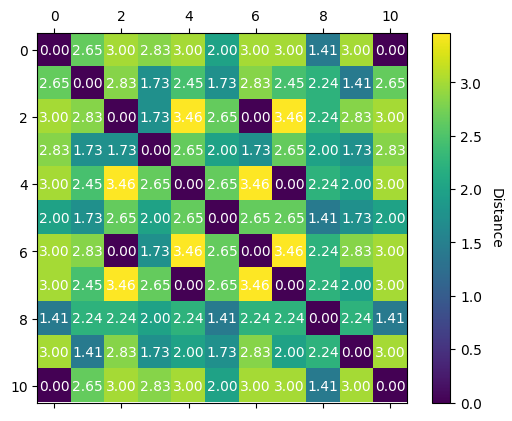

In [45]:
fig, ax = plt.subplots()
cax = ax.matshow(distance_matrix, cmap='viridis')

# Distance values for matrix cells
for i in range(len(sequences_str)):
    for j in range(len(sequences_str)):
        ax.text(j, i, f'{distance_matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Add color bar
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Distance', rotation=270, labelpad=15)

Create a tree using a clustering algorithm. Here we use [UPGMA](https://en.wikipedia.org/wiki/UPGMA). That is indicated by the parameter `method='average'`, see [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) for details.

In [46]:
Z = linkage(pdist(sequences_str, metric='euclidean'), method='average')

Plot the tree

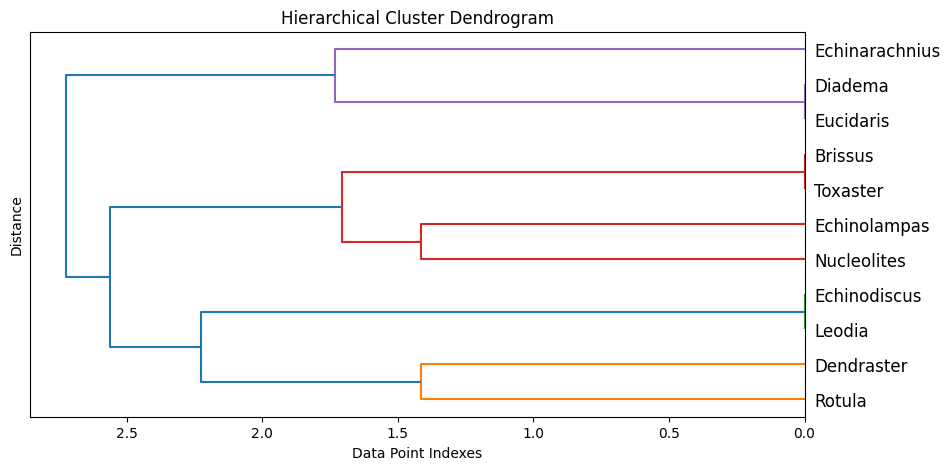

In [47]:
plt.figure(figsize=(10, 5))
dendrogram(Z,
            orientation='left',
            labels=Taxa,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.title('Hierarchical Cluster Dendrogram')
plt.xlabel('Data Point Indexes')
plt.ylabel('Distance')
plt.show()